In [842]:
# # # This one overfits a little

# from sklearn.datasets import make_regression

# # This creates a dummy dataset (look at sklearn docs to undestand it) 
# X, y = make_regression(
#     n_samples=300,
#     n_features= 30,
#     n_informative= 3,
#     n_targets=1,
#     bias = 0,
#     noise= 20,
#     random_state = 0)

# # Add (n*p) feature which are their polynomial exponents X1**2, X1**3...X1**p, X2**2, ...Xn**p
# p = X.shape[1]
# n = X.shape[0]
# max_degree = 30
# for j in range(p):
#     for exponent in range(2,max_degree+1):
#         # create new features that are exponent of the existing ones
#         X = np.append(X, (X[:,j]**exponent).reshape(n,1), axis=1)

In [3]:
# from sklearn import datasets
# X,y = datasets.load_diabetes(return_X_y=True, as_frame=False)
# print(X.shape)
# print(y.shape)

(442, 10)
(442,)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Gradient Descent (Advanced)

In this exercice, we will

- code our own gradient descent in vectorized form for a high-dimension loss function
- Investigate early stopping criteria to avoid overfitting

## Our dataset

(100, 1)


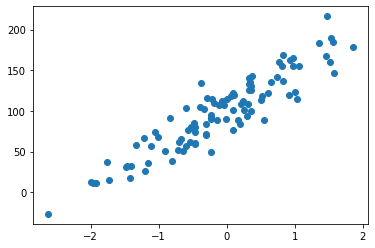

In [434]:
from sklearn.datasets import make_regression

# This creates a dummy dataset (look at sklearn docs to undestand it) 
X, y = make_regression(
    n_samples=100,
    n_features= 1,
    n_informative= 1,
    n_targets=1,
    bias = 100,
    noise= 20,
    tail_strength = 0.99,
    random_state = 42)
print(X.shape)
plt.scatter(X,y);

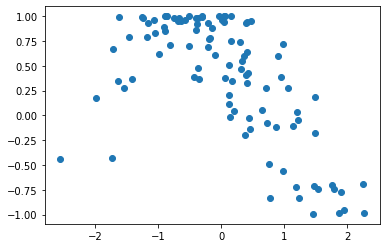

In [342]:
# # Give the scatter plot some curvature 
# X_range = X.max() - X.min()
# y_range = y.max() - y.min()
# f = (X_range / y_range)/3
# y = np.sin(np.pi * f * y)
# plt.scatter(X,y)

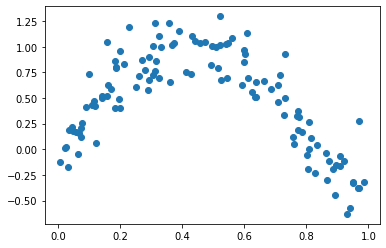

In [426]:
# np.random.seed(42)
# x = np.sort(np.random.rand(120))
# X = x.reshape((len(x), 1))

# y = np.sin(1.2 * x * np.pi) + 0.2 * np.random.randn(len(x))
# plt.scatter(X,y);

In [435]:
X.shape

(100, 1)

-8.708177371954938e+16


ValueError: x and y must be the same size

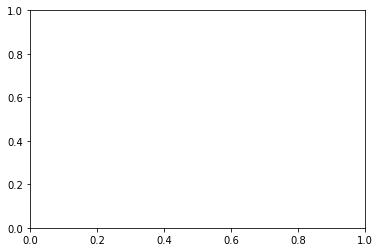

In [466]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)
linreg = LinearRegression().fit(X_train,y_train)
y_pred_linreg = linreg.predict(X_test)

print(r2_score(y_test, y_pred_linreg))
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred_linreg, color='#FFC90E', linewidth=3)

In [450]:
# Create all polynomial transforms
from sklearn.preprocessing import PolynomialFeatures
interaction = PolynomialFeatures(degree=25, include_bias=False, interaction_only=False)
X = interaction.fit_transform(X)

In [395]:
# Add (n*p) feature which are their polynomial exponents X1**2, X1**3...X1**p, X2**2, ...Xn**p
p = X.shape[1]
n = X.shape[0]
max_degree = 30
for j in range(p):
    for exponent in range(2,max_degree+1):
        # create new features that are exponent of the existing ones
        X = np.append(X, (X[:,j]**exponent).reshape(n,1), axis=1)

In [457]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [458]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.794053,0.126366,0.772037,0.015969,0.854659,2.018031e-03,0.919494,2.550177e-04,0.957795,3.222649e-05,...,0.997250,8.218325e-09,0.998623,1.038546e-09,0.999311,1.312407e-10,0.999656,1.658483e-11,0.999828,0.0
1,0.605272,0.001100,0.738874,0.000001,0.849835,1.345769e-09,0.918835,1.485802e-12,0.957708,1.640405e-15,...,0.997250,2.437317e-27,0.998623,2.690929e-30,0.999311,2.970930e-33,0.999656,3.280067e-36,0.999828,0.0
2,0.349290,0.163007,0.690219,0.026572,0.840717,4.331594e-03,0.917228,7.060958e-04,0.957435,1.151011e-04,...,0.997249,8.127242e-08,0.998623,1.324827e-08,0.999311,2.159608e-09,0.999656,3.520391e-10,0.999828,0.0
3,0.656077,0.014385,0.740122,0.000207,0.849856,2.979033e-06,0.918836,4.286477e-08,0.957708,6.167734e-10,...,0.997250,2.643785e-17,0.998623,3.804094e-19,0.999311,5.473642e-21,0.999656,7.875924e-23,0.999828,0.0
4,0.478658,0.033452,0.734325,0.001119,0.849660,3.744610e-05,0.918829,1.252782e-06,0.957708,4.191256e-08,...,0.997250,5.250729e-14,0.998623,1.756663e-15,0.999311,5.877022e-17,0.999656,1.966193e-18,0.999828,0.0


❓ Standardize all your features, and (only) then add an "constant" $X_0$ to your dataset so that your OLS will be centered around the mean

In [459]:
X = np.hstack((X, np.ones((X.shape[0],1))))

In [460]:
X.shape

(100, 27)

In [461]:
#sns.heatmap(pd.DataFrame(X).corr(), cmap='coolwarm')

❓Create a train test split

In [462]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=414)

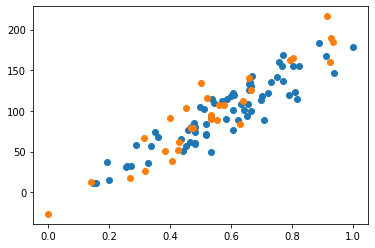

In [465]:
plt.scatter(X_train[:,0], y_train)
plt.scatter(X_test[:,0], y_test)

In [467]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.802409,0.136710,0.776195,1.869056e-02,0.855708,2.555251e-03,0.919703,3.493372e-04,0.957832,4.775908e-05,...,1.668402e-08,0.998623,2.280930e-09,0.999311,3.118338e-10,0.999656,4.263187e-11,0.999828,0.0,1.0
1,0.338417,0.178340,0.683200,3.180610e-02,0.838420,5.672384e-03,0.916634,1.011628e-03,0.957299,1.804164e-04,...,1.825143e-07,0.998623,3.255008e-08,0.999311,5.805068e-09,0.999656,1.035291e-09,0.999828,0.0,1.0
2,0.577796,0.000183,0.738845,3.496059e-08,0.849834,6.540860e-12,0.918835,1.223258e-15,0.957708,2.287692e-19,...,2.798438e-34,0.998623,5.233535e-38,0.999311,9.787566e-42,0.999656,1.830435e-45,0.999828,0.0,1.0
3,0.938939,0.363379,0.900691,1.320464e-01,0.917481,4.798326e-02,0.945412,1.743625e-02,0.967774,6.336015e-03,...,1.104763e-04,0.998690,4.014509e-05,0.999335,1.458800e-05,0.999664,5.301014e-06,0.999831,0.0,1.0
4,0.535321,0.007424,0.738374,5.516672e-05,0.849830,4.097471e-07,0.918835,3.043368e-09,0.957708,2.260441e-11,...,6.879354e-20,0.998623,5.109593e-22,0.999311,3.795115e-24,0.999656,2.818795e-26,0.999828,0.0,1.0


## Code your vectorial gradient descent

We're modelling a linear regression $\hat{y} = X\beta$

Let's recall the definition of the gradient descent algorithm

$$\text{Gradient descent - vector formula}$$
$$\beta^{\color {red}{(k+1)}} = \beta^{\color {red}{(k)}} - \eta \ \nabla L(\beta^{\color{red}{(k)}})$$

The MSE Loss for an OLS regression is

$$L(\beta) = \frac{1}{n}\|X \beta - y\|^2 = \frac{1}{n}(X \beta - y)^T(X \beta - y)$$

and its gradient is
$${\displaystyle \nabla L(\beta)=
{\begin{bmatrix}{\frac {\partial L}{\partial \beta_{0}}}(\beta)\\\vdots \\{\frac {\partial L}{\partial \beta_{p}}}(\beta)\end{bmatrix}} = \frac{2}{n} X^T (X\beta - y) 
}$$

Let's store below our main problem parameters

In [468]:
eta = 0.01 # learning rate
n_epochs = 5000 # number of epochs in our gradient descent
n = X.shape[0] # n observations
n_train = X_train.shape[0]
n_test = X_test.shape[0]
p = X.shape[1] # p features

___
❓ Initialize a $\beta$ vector as an ndarray of the right shape for our problem with the values of your choice (zeros, for instance)

In [469]:
beta = np.zeros(p)
beta.shape

(27,)

❓ Using the vectorized formula given above, create a gradient descent that loops over `n_epochs` to find the best $\beta$ of an OLS using the `train` set
- make use of numpy's matrix operations and broadcasting capabilities (convert your X to numpy's
- this shouldn't take more than 4 lines of code!
- use `%%time` to keep track of computation time, and and [`tqdm`](https://pypi.org/project/tqdm/) to display the progress bar

In [470]:
# convert X,y to numpy ND array, it's much faster than pandas to make matrix products
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [471]:
%%time
from tqdm import tqdm

for epoch in tqdm(range(n_epochs)):
    gradients = 2/n_train * X_train.T.dot(X_train.dot(beta) - y_train) 
    beta = beta - eta * gradients

100%|██████████| 5000/5000 [00:00<00:00, 145938.58it/s]

CPU times: user 34.2 ms, sys: 5.18 ms, total: 39.4 ms
Wall time: 36.7 ms


In [472]:
beta

array([ 1.74482915e+02,  1.02483158e+00,  4.72442936e+01, -6.35266661e+00,
        1.49989741e+01, -5.06876563e+00,  3.07502517e+00, -3.13344226e+00,
       -1.85238212e+00, -1.79580200e+00, -4.00961326e+00, -9.98725590e-01,
       -5.00023098e+00, -5.48523165e-01, -5.47477656e+00, -2.99974606e-01,
       -5.71032404e+00, -1.64029854e-01, -5.83058895e+00, -8.98696847e-02,
       -5.89333635e+00, -4.93819004e-02, -5.92661301e+00, -2.72226631e-02,
       -5.94447908e+00,  0.00000000e+00, -5.96595616e+00])

## Compare results with sklearn models

❓Compute your `mse_test` metrics, and compare your results (mse and computation time) with
- a Sklearn LinearRegression()
- SGDRegressor, with similar epochs and learning_rate, adding 'penalty'= None to remove regularization that we will see in ML-05-Model-Tuning)
- (optional) cross_validate all your metrics to be sure of your scores

Are you better? Faster? 

In [473]:
## TODO CROSS VALIDATE ALL THESE METRICS

In [474]:
y_pred = X_test.dot(beta)
print(mean_squared_error(y_pred, y_test))
print(r2_score(y_pred, y_test))

447.4045013064743
0.7993640924884384


In [475]:
%%time
linreg = LinearRegression().fit(X_train,y_train)

CPU times: user 1.08 ms, sys: 306 µs, total: 1.39 ms
Wall time: 1.09 ms


In [476]:
print(mean_squared_error(linreg.predict(X_test), y_test))
print(r2_score(linreg.predict(X_test), y_test))

2.8074295616126734e+20
-0.034483500061780914


In [477]:
%%time
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(max_iter=n_epochs, eta0=eta, penalty=None, learning_rate = 'constant')
sgd = sgd.fit(X_train,y_train)

CPU times: user 2.32 ms, sys: 1.14 ms, total: 3.47 ms
Wall time: 1.97 ms


In [478]:
print(mean_squared_error(sgd.predict(X_test), y_test))
print(r2_score(sgd.predict(X_test), y_test))

523.1727314026751
0.745621462382004


❓ Wrap this logic into a function `gradient_descent`, which takes any (X_train, y_train, X_test, y_test, eta, n_epoch) as input, and returns 
- the final value for $\beta$ fitted on the train set
- the values of the `loss_train` at each epoch as a list `loss_train_history`
- the values of the `loss_test` at each epoch as a list `loss_test_history`
- (optional) make the fonction robust to call with only a train_set

In [479]:
def gradient_descent(X_train, y_train, X_test, y_test, eta=eta, n_epochs=n_epochs):
    n_train = X_train.shape[0]
    n_test = X_test.shape[0]
    p = X_train.shape[1]
    
    loss_train_history = []
    loss_test_history = []
    
    beta = np.zeros(p)
    
    for epoch in range(n_epochs):
        # update beta
        gradient = 2/n_train * X_train.T.dot(X_train.dot(beta) - y_train)
        beta = beta - eta * gradient
        
        # compute loss
        y_pred_train = X_train.dot(beta)
        y_pred_test = X_test.dot(beta)
        loss_train = 1/n_train*(y_train - y_pred_train).T.dot(y_train - y_pred_train)
        loss_test = 1/n_test*(y_test - y_pred_test).T.dot(y_test - y_pred_test)
        
        loss_test_history.append(loss_test)
        loss_train_history.append(loss_train)
        
    return beta, loss_train_history, loss_test_history

## Early stopping criteria?

❓Plot the loss as a function of epochs, on your train dataset. 
- Try it with `n_epochs=50000` and `eta=0.1` as per initially set
- What can you conclude? Should you always descent gradient down to the absolute minimum?

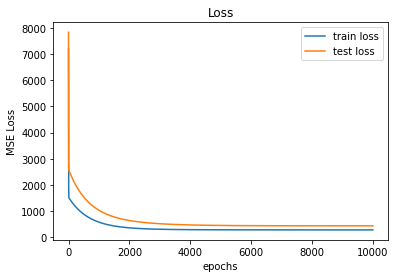

In [484]:
beta, loss_train_history, loss_test_history =\
gradient_descent(X_train, y_train, X_test, y_test, n_epochs=10000, eta=0.01)

plt.plot(loss_train_history, label='train loss')
plt.plot(loss_test_history, label='test loss')
plt.title('Loss')
plt.ylabel('MSE Loss')
plt.xlabel('epochs')
plt.legend()

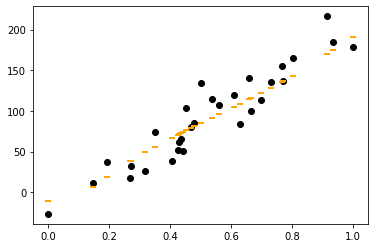

In [485]:
y_pred = X_test.dot(beta)
plt.scatter(X_test[:,0], y_test,  color='black')
plt.scatter(X_test[:,0], y_pred, color='orange', linewidth=2, marker="_")
#plt.plot(X_test[:,0], linreg.predict(X_test), color='black', linewidth=3)

❓ Try to improve your own model MSE by coding an **early stopping criteria** where you would stop descending gradient as soon as `loss_test` increases again

In [18]:
# TODO

❓ Did you notice...you have just done a data-leak! Can you guess why? Think about a solution to this problem!

<details>
    <summary>Hint</summary>

- You have used your test set to decide when to stop descending gradient
- You should never use your test set to optimize your model `hyperparameters`
- Create a train/test split **within** your current training set and optmize your early stopping based on the loss on this new test set only. This one is called a "validation set"
</details>

In [19]:
X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

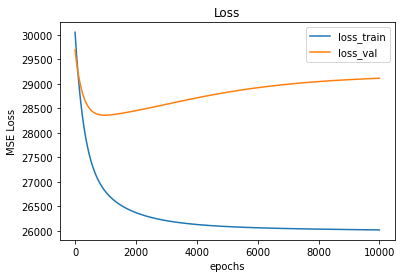

In [20]:
beta, loss_train_history, loss_test_history = gradient_descent(X_train_train, y_train_train, X_train_val, y_train_val, n_epochs=n_epochs, eta=eta)

plt.plot(loss_train_history, label='loss_train')
plt.plot(loss_test_history, label='loss_val')
plt.title('Loss');plt.ylabel('MSE Loss'); plt.xlabel('epochs'); plt.legend();

## Code your own MiniBatch Gradient Descent

❓Modify your `gradient_descent` function into a `minibatch_gradient_descent` one.

In [21]:
def minibatch_gradient_descent(X_train, y_train, X_test=None, y_test=None, batch_size=16, eta=eta, n_epochs=n_epochs):

    # if no test set is provided, set them equal to the train set
    if not (isinstance(X_test, np.ndarray) and isinstance(y_test, np.ndarray)):
        X_test = X_train
        y_test = y_train
        
    n_train = X_train.shape[0]
    n_test = X_test.shape[0]
    p = X_train.shape[1]
    beta = np.zeros(p)
    loss_train_history = []
    loss_test_history = []
    
    for epoch in range(n_epochs):
        # select a random subset of X_train
        indices = np.random.permutation(n_train)
        X_train = X[indices]
        y_train = y[indices]
        
        # pass batch-per-batch over all datapoints to update beta
        for i in range(0,n_train,batch_size):
            X_mini = X_train[i:i+batch_size]
            y_mini = y_train[i:i+batch_size]
            y_pred_mini = X_mini.dot(beta)
            gradients = 2/batch_size * X_mini.T.dot(X_mini.dot(beta) - y_mini) 
            beta = beta - eta * gradients
        
        # keep track of loss histories per epoch
        y_pred_train = X_train.dot(beta) - y_train
        y_pred_test = X_test.dot(beta) - y_test
        loss_test_history.append(1/n_test*(y_test - y_pred_test).T.dot(y_test - y_pred_test))
        loss_train_history.append(1/n_train*(y_train - y_pred_train).T.dot(y_train - y_pred_train))
        
    return beta, loss_train_history, loss_test_history

👇 Plot the evolution of your train and val losses per epoch. What if you choosed minibatch = 1?

In [22]:
beta, loss_train_history, loss_test_history = minibatch_gradient_descent(
    X_train, y_train, X_test, y_test, batch_size=1, n_epochs=1000)

Text(0.5, 1.0, 'Minibatch loss history')

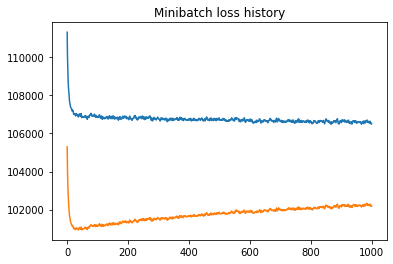

In [23]:
plt.plot(loss_train_history, label='loss_train')
plt.plot(loss_test_history, label='loss_test')
plt.title('Minibatch loss history')

## (Optional) finetuning

Try to narrow performance gap between your self-made model and SKLearn by
- changing initial learning_rate `eta`
- gradually reduce learning_rate in your `minibatch_gradient_descent` function
- optimize your minibatch code so as to paralellize it better

### ⚠️ Please, push your exercice when you are done 🙃

# 🏁